In [1]:
#importing relevant lybraries
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500) #in order to better look at results

#importing data
data=pd.read_csv('customer_data_sample.csv')

In [2]:
#Step0: looking at the data
data.head()
data.tail()

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
886,15887,0,12,male,27.0,0,0,26.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,NaN,1,2,46.9,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere
890,15891,0,13,male,32.0,0,0,15.5,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Turku


In [3]:
data.branch.unique()
data.gender.unique()

array(['male', 'female'], dtype=object)

In [4]:
#converting gender and branch into a numerical value:
female=[]
for g in data.gender:
    if g=='female': female.append(1)
    else: female.append(0)
data['female']=female

branch_n=[]
for b in data.branch:
    if b=='Helsinki': branch_n.append(0)
    elif b=='Tampere': branch_n.append(1)
    elif b=='Turku': branch_n.append(2)
    else: branch_n.append(None)

data['branch_n']=branch_n

In [5]:
data.tail()

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch,female,branch_n
886,15887,0,12,male,27.0,0,0,26.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki,0,0.0
887,15888,1,11,female,19.0,0,0,60.0,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki,1,0.0
888,15889,0,13,female,NaN,1,2,46.9,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki,1,0.0
889,15890,1,11,male,26.0,0,0,60.0,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere,0,1.0
890,15891,0,13,male,32.0,0,0,15.5,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Turku,0,2.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        891 non-null    int64  
 1   converted          891 non-null    int64  
 2   customer_segment   891 non-null    int64  
 3   gender             891 non-null    object 
 4   age                714 non-null    float64
 5   related_customers  891 non-null    int64  
 6   family_size        891 non-null    int64  
 7   initial_fee_level  891 non-null    float64
 8   credit_account_id  891 non-null    object 
 9   branch             889 non-null    object 
 10  female             891 non-null    int64  
 11  branch_n           889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [7]:
data.describe()

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level,female,branch_n
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,15446.000000,0.383838,12.308642,29.699118,0.523008,0.381594,64.408416,0.352413,0.362205
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,99.386857,0.477990,0.636157
min,15001.000000,0.000000,11.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15223.500000,0.000000,12.000000,20.125000,0.000000,0.000000,15.820800,0.000000,0.000000
50%,15446.000000,0.000000,13.000000,28.000000,0.000000,0.000000,28.908400,0.000000,0.000000
75%,15668.500000,1.000000,13.000000,38.000000,1.000000,0.000000,62.000000,1.000000,1.000000
max,15891.000000,1.000000,13.000000,80.000000,8.000000,6.000000,1024.658400,1.000000,2.000000


In [8]:
data.age.unique()
#Something is wrong with the Ages

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

From these few observation i think it is needed some cleaning of the variable "age".

According to danish law, "The Danish government recently passed legislation that prohibits the collection and processing of personal data belonging to children below the age of 13" (https://www.jurist.org/news/2023/06/denmark-to-raise-age-at-which-tech-companies-can-collect-minors-data/). 
therefore i will exclude 69 observation points from the analysis. (among them there are 7 whose values is lower than 1 (e.g. age=0.42) that may be a typing mistake and few more where the age of the customer would lead me to think about a wrong informatoin e.g. age=2 or age=4. Those have the highest frequencies - 10 each.)

In [9]:
data_age=data[data['age']<13]
data_age.groupby('age')['customer_id'].count()

age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
Name: customer_id, dtype: int64

In [10]:
sum(data_age.groupby('age')['customer_id'].count())

69

OBSERVATIONS:
No additional information on the ages at this point.

We have overall 38% of conversion rate and the customers have less than 30 years. On average one person has 2 customers (see 'Related customer' variable). majority of customers seems to have 0 family_size. on average the initial_fee_level is 64.4

In [11]:
data.initial_fee_level.unique()[:10]
#initial fee level seems to be quite volatile as variable. there is no additional information on the trace. But it looks a bit suspicious.

array([ 14.5   , 142.5666,  15.85  , 106.2   ,  16.1   ,  16.9166,
       103.725 ,  42.15  ,  22.2666,  60.1416])

In [12]:
#checking nulls
data.isnull().sum()

customer_id            0
converted              0
customer_segment       0
gender                 0
age                  177
related_customers      0
family_size            0
initial_fee_level      0
credit_account_id      0
branch                 2
female                 0
branch_n               2
dtype: int64

In [17]:
#Cleaning data form the "suspicious ages"
data_clean=data#[data['age']>13]
#dropping duplicates
data_clean=data_clean.drop_duplicates()
#dropping empty cells
data_clean=data_clean.dropna()
#rounding the age into an integer
age_r=[int(a) for a in data_clean.age]
data_clean['age_r']=age_r
#cleaning the index
data_clean.reset_index(inplace=True, drop=True)


In [18]:
#checking new data
data_clean.nunique()

customer_id          712
converted              2
customer_segment       3
gender                 2
age                   88
related_customers      6
family_size            7
initial_fee_level    219
credit_account_id    134
branch                 3
female                 2
branch_n               3
age_r                 71
dtype: int64

In [19]:
data_clean.describe()

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level,female,branch_n,age_r
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,15448.589888,0.404494,12.240169,29.642093,0.514045,0.432584,69.134503,0.363764,0.261236,29.622191
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,105.877296,0.481420,0.521561,14.502891
min,15001.000000,0.000000,11.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15222.750000,0.000000,11.000000,20.000000,0.000000,0.000000,16.100000,0.000000,0.000000,20.000000
50%,15445.000000,0.000000,12.000000,28.000000,0.000000,0.000000,31.291700,0.000000,0.000000,28.000000
75%,15677.250000,1.000000,13.000000,38.000000,1.000000,1.000000,66.000000,1.000000,0.000000,38.000000
max,15891.000000,1.000000,13.000000,80.000000,5.000000,6.000000,1024.658400,1.000000,2.000000,80.000000


In [20]:
data_clean.groupby('credit_account_id')['customer_id'].count()
data.groupby('credit_account_id')['customer_id'].count()

credit_account_id_d=[]
for c in data_clean['credit_account_id']:
    if c=='9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        credit_account_id_d.append(1)
    else:
        credit_account_id_d.append(0)
data_clean['credit_account_id_dummy']=credit_account_id_d

OBSERVATIONS:
Changes seems not to affect deeply the averages of the variables (excluding age for obvious reasons)

Dropping the nempty cells and the duplicates (and cleaning for the age<13) we lost 250 observation (around 28% of the data). A deeper knowledge of the nature of the data itself could lead me to do not delete and try to save some of it. Given the current situation i prefer continuing with the analysis of the 641 "clean" data. 

9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0  had  687 observation. after cleaning it went down to 469. (218 out of the lost 250) i belive it may be a residual category. I will create a dummy variable where 1 indicated the id above with the majority of observations and 0 all the others ids.

Before proceeding I will make a quick check of the other variables in the dataset

In [21]:
#Checking variables
data_clean.groupby('family_size')['customer_id'].count()
data_clean.groupby('customer_id')['customer_id'].count()
data_clean.groupby('converted')['customer_id'].count()
data_clean.groupby('customer_segment')['customer_id'].count()
data_clean.groupby('related_customers')['customer_id'].count()
data_clean.groupby('family_size')['customer_id'].count()
data_clean.groupby('initial_fee_level')['customer_id'].count()
data_clean.groupby('female')['customer_id'].count()
data_clean.groupby('branch_n')['customer_id'].count()
data_clean.groupby('credit_account_id_dummy')['customer_id'].count()
print('ok')


ok


Observations:
vast majority of the customers are in segment 13 (306). seg 11=180 and seg 12=155.

Most of the customer has 0 People related to them (not sure about the meaning of this varible) 0=450, 1=162, 2=19, 3=5, 4=3, 5=2

Mos of family members are 0. 0=515, 1=74, 2=37, 3=5, 4=4, 5=5, 6=1

initial fee level seems to be quite volatile as variable. there is no additional information on the trace. But it looks a bit suspicious.

Most of the customer is male 416 vs 225

Most of the customers are in Helsinki=499. Tampere=118, Turku=24 


WE CAN NOW START OUR ANALYSIS

having the information above in mind


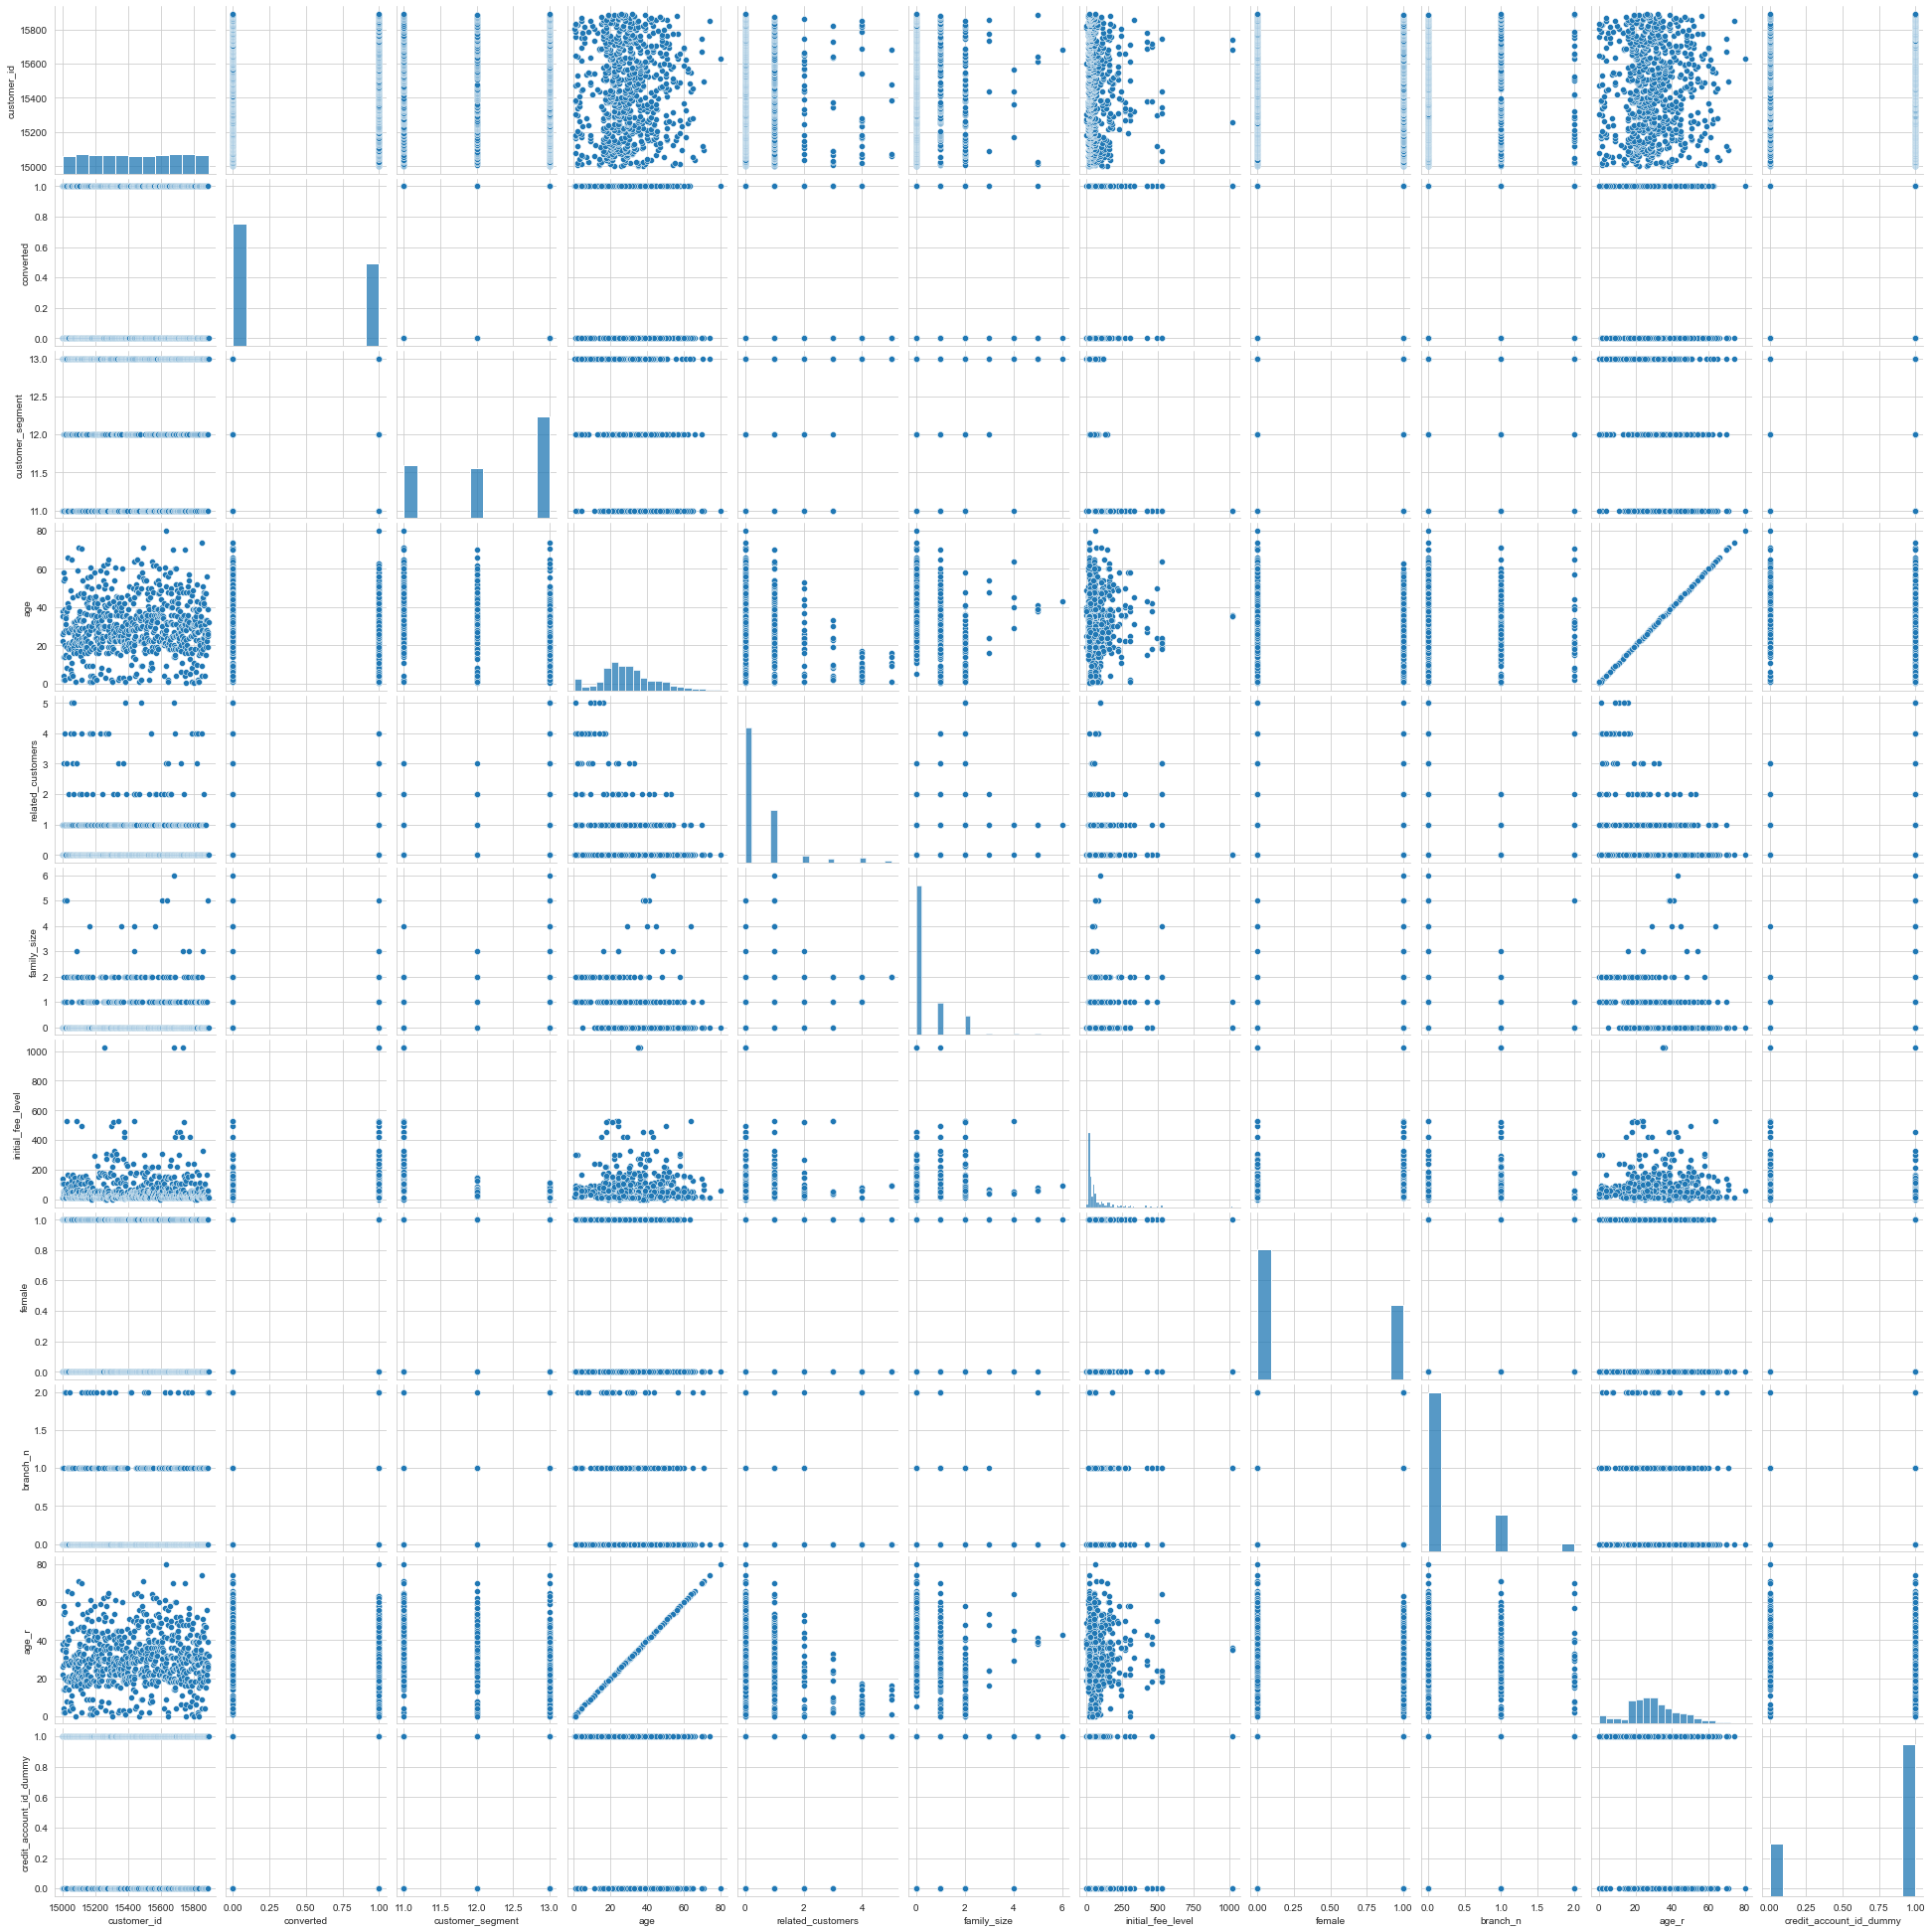

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(data_clean)

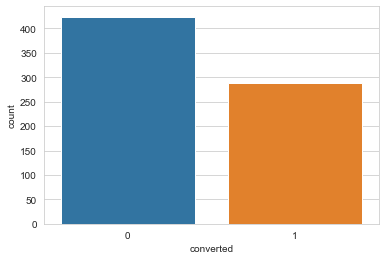

In [23]:
sns.countplot(data=data_clean, x='converted')
plt.rcParams['figure.figsize'] = [10,3]

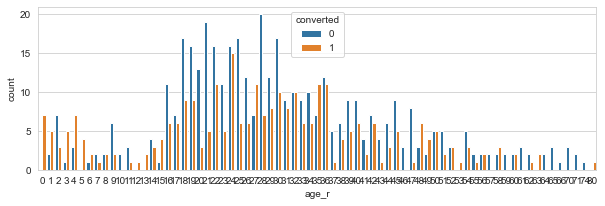

In [24]:
sns.countplot(data=data_clean, x='age_r', hue='converted')
plt.rcParams['figure.figsize'] = [100,7]

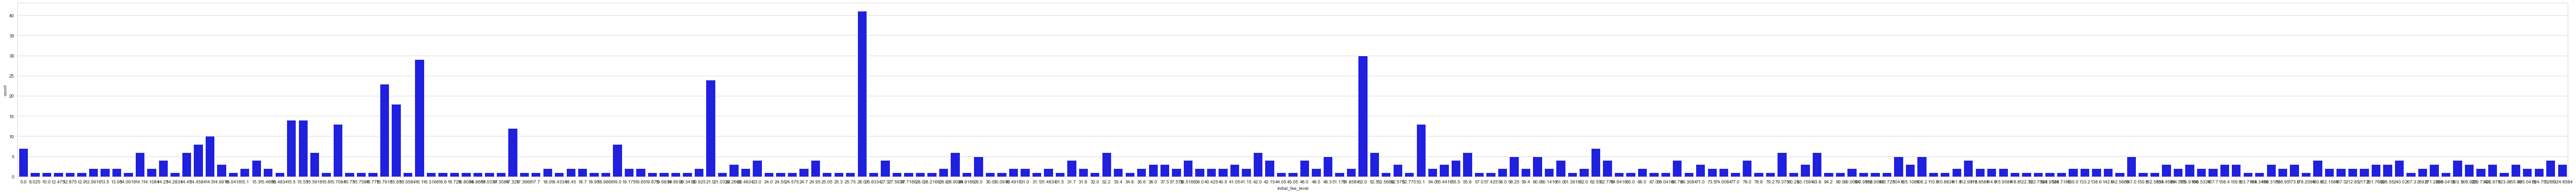

In [25]:
sns.countplot(data=data_clean, x='initial_fee_level', color='blue', linewidth=1)
plt.rcParams['figure.figsize'] = [100,20]

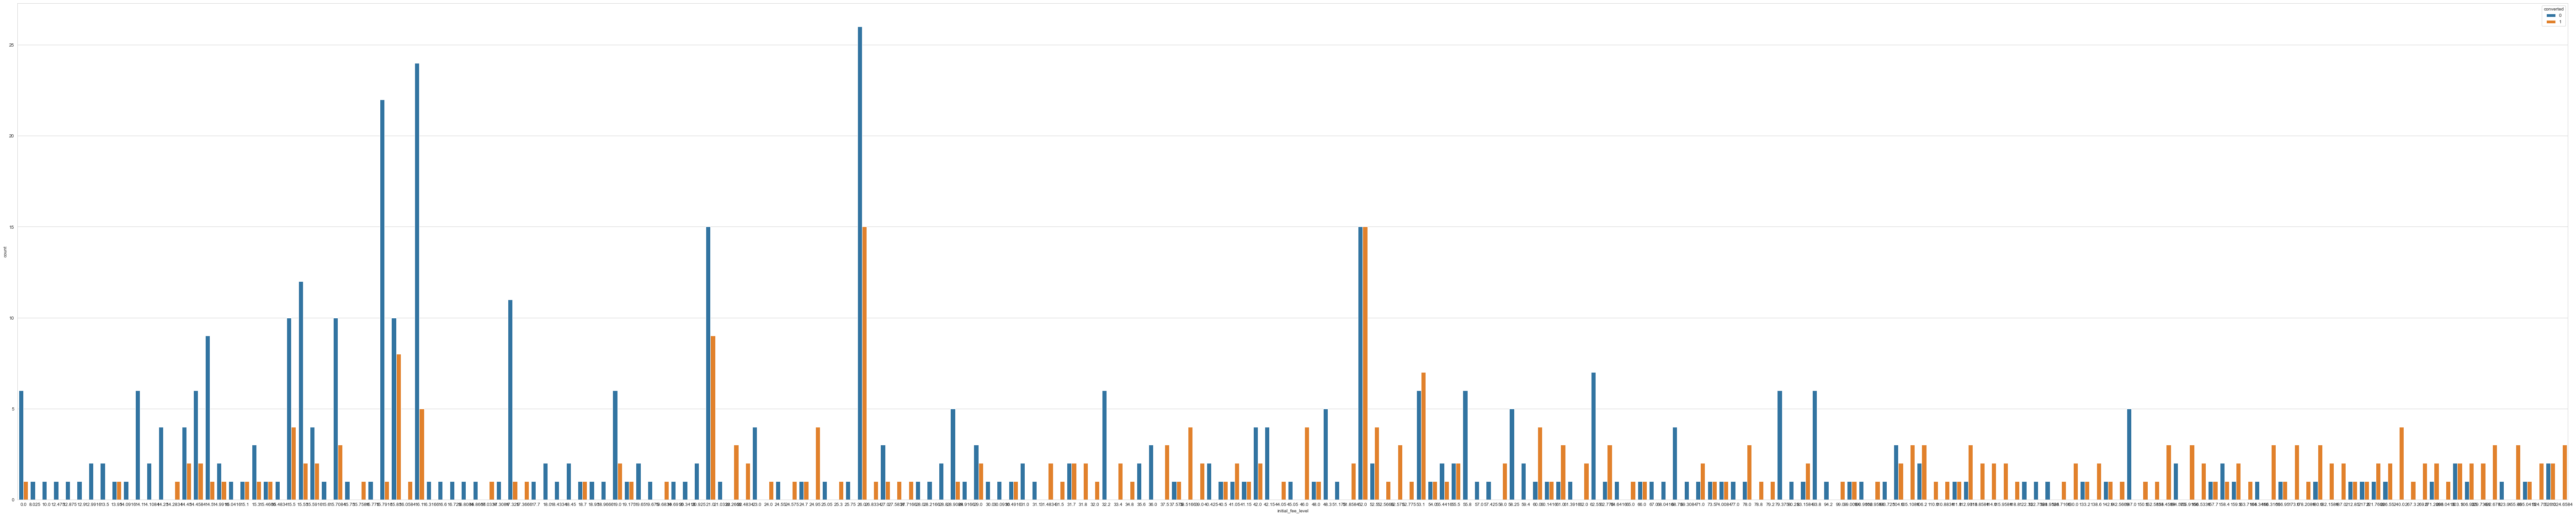

In [26]:
sns.countplot(data=data_clean, x='initial_fee_level', hue='converted')
plt.rcParams['figure.figsize'] = [100,20]

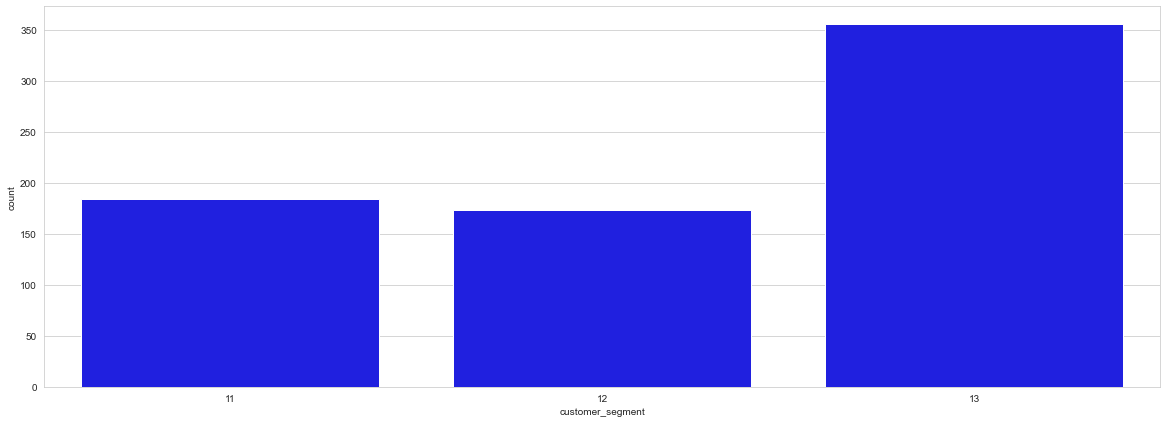

In [58]:
sns.countplot(data=data_clean, x='customer_segment', color='blue')
plt.rcParams['figure.figsize'] = [10,3]

<AxesSubplot:xlabel='customer_segment', ylabel='count'>

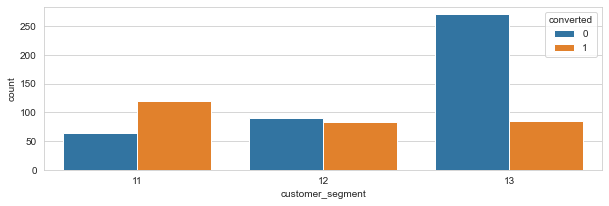

In [28]:
sns.countplot(data=data_clean, x='customer_segment',hue='converted')

<AxesSubplot:xlabel='branch', ylabel='count'>

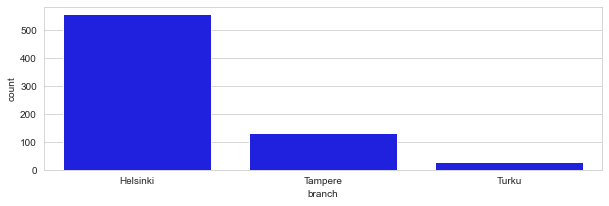

In [29]:
sns.countplot(data=data_clean, x='branch', color='blue')


<AxesSubplot:xlabel='branch', ylabel='count'>

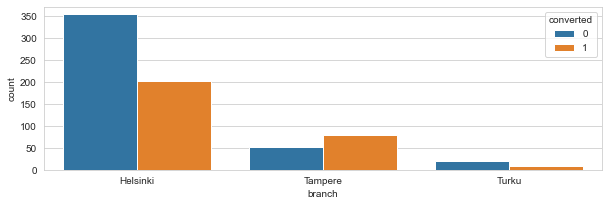

In [30]:
sns.countplot(data=data_clean, x='branch',hue='converted')


<AxesSubplot:xlabel='gender', ylabel='count'>

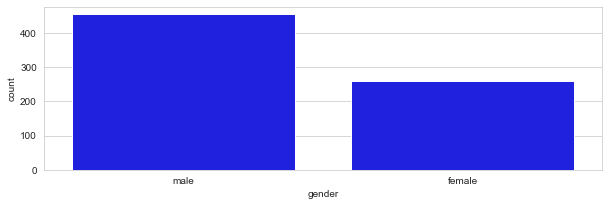

In [31]:
sns.countplot(data=data_clean, x='gender', color='blue')
#plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

<AxesSubplot:xlabel='gender', ylabel='count'>

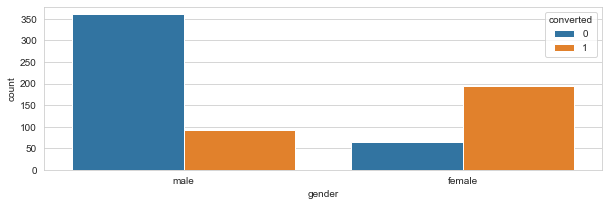

In [32]:
sns.countplot(data=data_clean, x='gender',hue='converted')

<AxesSubplot:xlabel='related_customers', ylabel='count'>

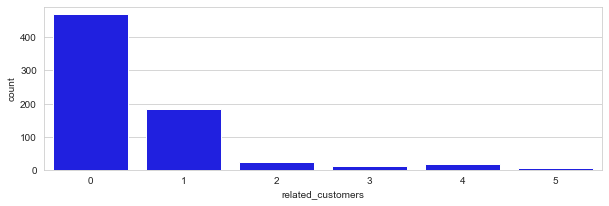

In [33]:
sns.countplot(data=data_clean, x='related_customers',color='blue')

<AxesSubplot:xlabel='related_customers', ylabel='count'>

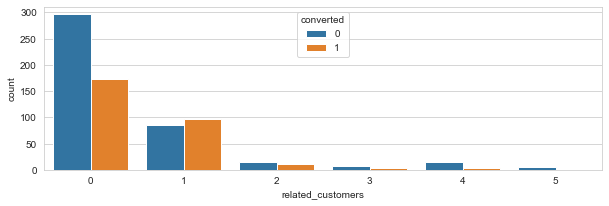

In [34]:
sns.countplot(data=data_clean, x='related_customers',hue='converted')

<AxesSubplot:xlabel='family_size', ylabel='count'>

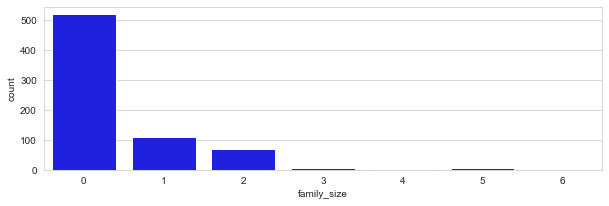

In [35]:
sns.countplot(data=data_clean, x='family_size',color='blue')

<AxesSubplot:xlabel='family_size', ylabel='count'>

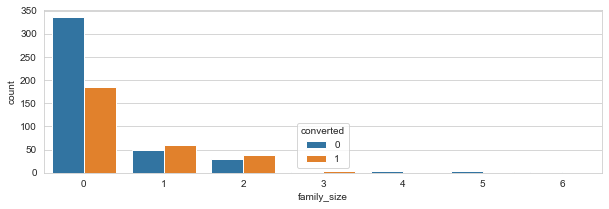

In [36]:
sns.countplot(data=data_clean, x='family_size',hue='converted')

<AxesSubplot:xlabel='credit_account_id_dummy', ylabel='count'>

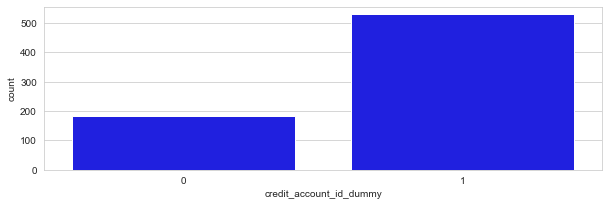

In [37]:
sns.countplot(data=data_clean, x='credit_account_id_dummy',color='blue')

<AxesSubplot:xlabel='credit_account_id_dummy', ylabel='count'>

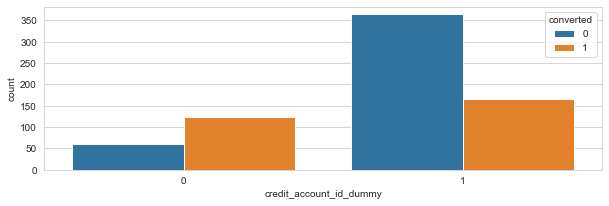

In [38]:
sns.countplot(data=data_clean, x='credit_account_id_dummy',hue='converted')

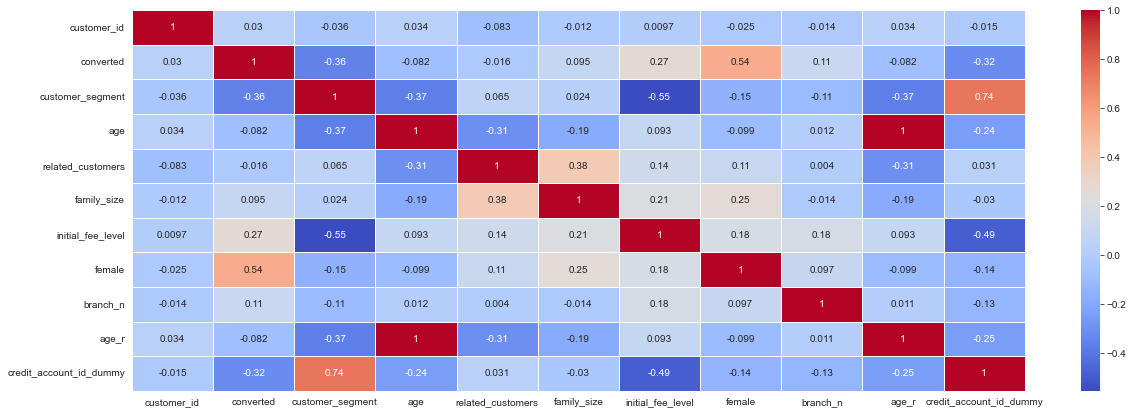

In [60]:
# Graphing correlation between columns
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.rcParams['figure.figsize'] = [30, 10]


<AxesSubplot:xlabel='credit_account_id_dummy', ylabel='count'>

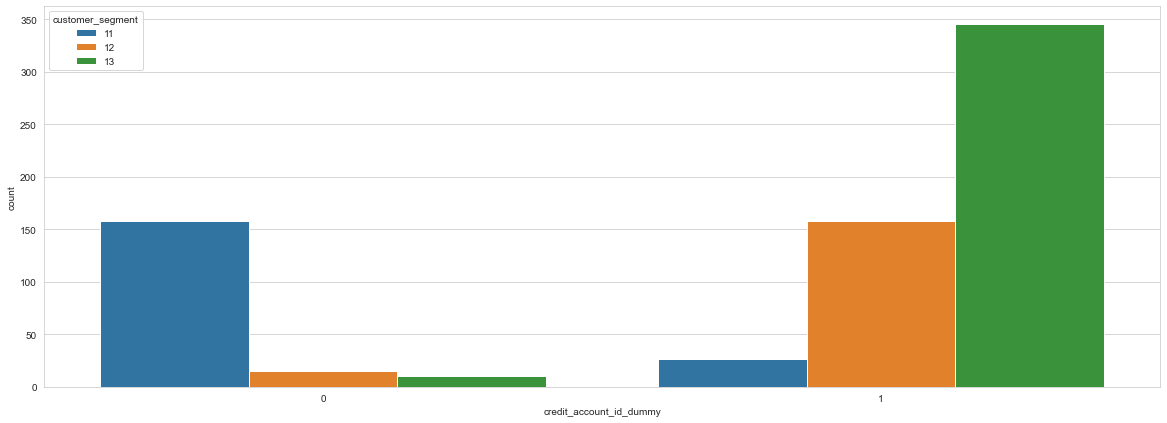

In [40]:
sns.countplot(data=data_clean, x='credit_account_id_dummy',hue='customer_segment')

Observations:
from the correlation table we can conclude that there is a mmoderate correlation between the gender and the converted variable. specifically, female seems to increase the probability to convert compared to male.

A mild positive correlation seems to exists between te variable converted and the variable "initial_fee_level". Nameling increasing the initial fee level, increase the probability to convert.

A mild negative correlation exist with the customer segment. Segment 11 seems to increase the probability to convert customers compared to segment 12 and expecially 13. I have no further information on the customer segment, therefore it is hard to draw conclusions with this.

A strong correlation exists between the Customer segment and the credit account they have. it looks like that segment 11 is almost never in the residual category of the credit account_ids. just the opposite for the other two segments.
This imply a mild negative correlation between the credit_account_id and the converted variable.

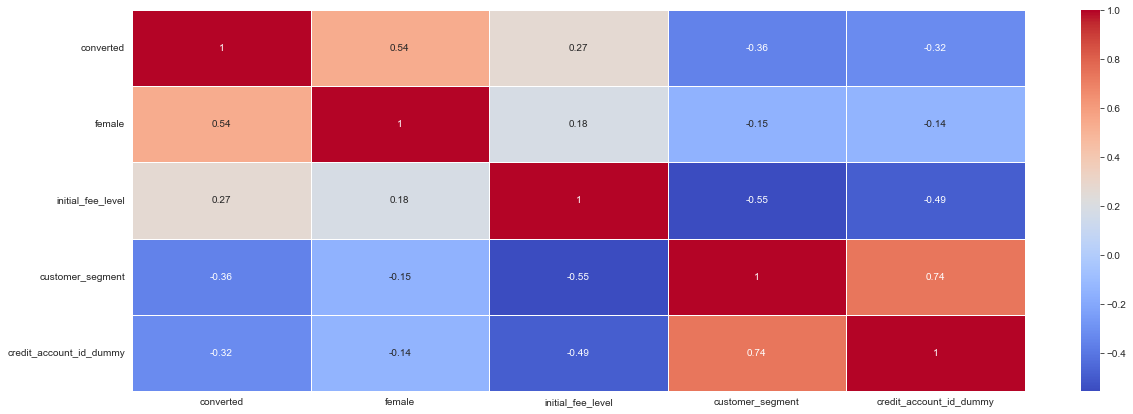

In [41]:
# Graphing correlation between columns
sns.heatmap(data_clean[['converted','female','initial_fee_level','customer_segment','credit_account_id_dummy' ]].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.rcParams['figure.figsize'] = [20, 7]
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

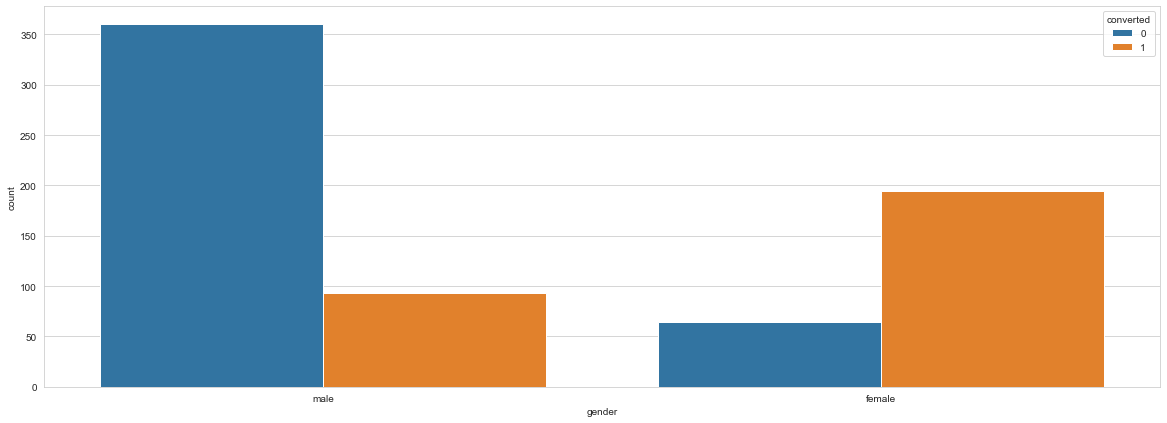

In [42]:
sns.countplot(data=data_clean, x='gender',hue='converted')

<AxesSubplot:xlabel='customer_segment', ylabel='count'>

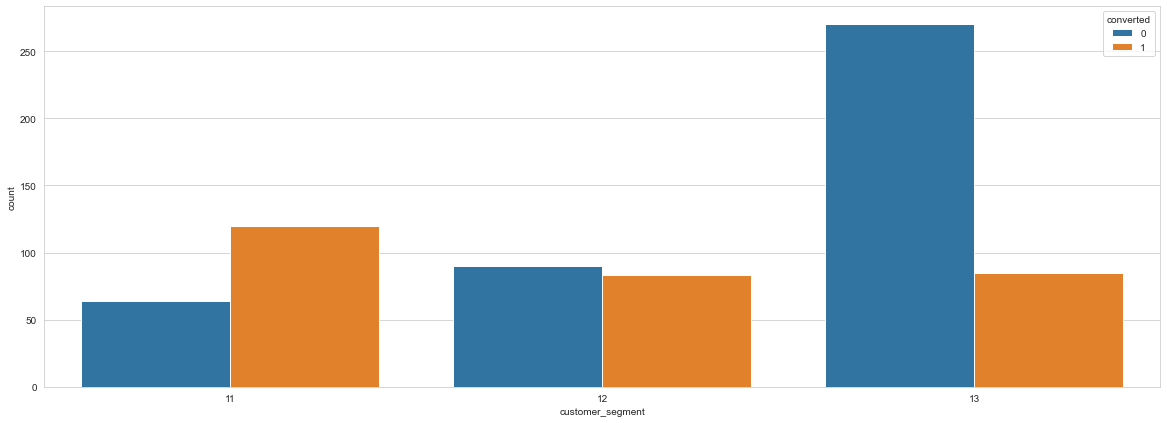

In [43]:
sns.countplot(data=data_clean, x='customer_segment',hue='converted')

<AxesSubplot:xlabel='credit_account_id_dummy', ylabel='count'>

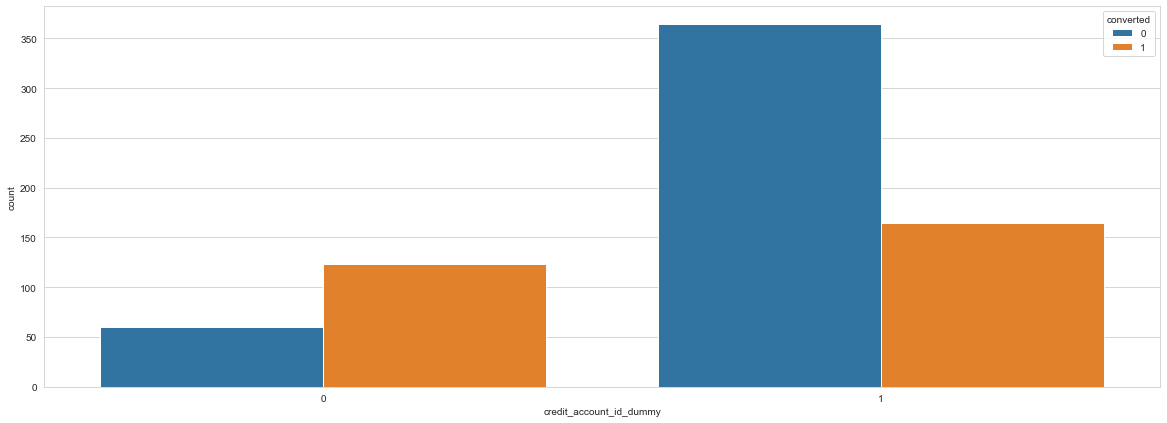

In [44]:
sns.countplot(data=data_clean, x='credit_account_id_dummy',hue='converted')

"What are the most important factors for predicting whether a customer has converted or not?"

In order to find the relevant factors I need to look at the nature of the problem and it´s component.
we are trying to understand how much the probability of an event to happen (converted or not) given the behaviour of the other variables (independent variables).

The nature of the dependent variable is categorical (dicotomical) and the nature of the dependent variables is different for each variable (categorical and/or interval (continuos), since we are dealing with different variables.) 

litterature* suggests to use a multiple logistic regression to identify the variable that best explain the probability to convert.

*https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/; https://stats.oarc.ucla.edu/spss/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-spss/#logistic


In [46]:
#make the dataset ready to the analysis
df=data_clean[['customer_id','converted','female','age_r','initial_fee_level','credit_account_id_dummy']]
df.head()

,customer_id,converted,female,age_r,initial_fee_level,credit_account_id_dummy
0,15001,0,0,22,14.5000,1
1,15002,1,1,38,142.5666,0
2,15003,1,1,26,15.8500,1
3,15004,1,1,35,106.2000,0
4,15005,0,0,35,16.1000,1


In [47]:
variables=['customer_segment','related_customers','family_size','branch']
for v in variables:
    temp=pd.get_dummies(data_clean[v], prefix=v)
    for c in temp.columns:
        df[c]=temp[c]

C:\Users\nicola.menale\AppData\Local\Temp\ipykernel_4508\3045636577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c]=temp[c]
C:\Users\nicola.menale\AppData\Local\Temp\ipykernel_4508\3045636577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c]=temp[c]
C:\Users\nicola.menale\AppData\Local\Temp\ipykernel_4508\3045636577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [48]:
df.columns

Index(['customer_id', 'converted', 'female', 'age_r', 'initial_fee_level',
       'credit_account_id_dummy', 'customer_segment_11', 'customer_segment_12',
       'customer_segment_13', 'related_customers_0', 'related_customers_1',
       'related_customers_2', 'related_customers_3', 'related_customers_4',
       'related_customers_5', 'family_size_0', 'family_size_1',
       'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5',
       'family_size_6', 'branch_Helsinki', 'branch_Tampere', 'branch_Turku'],
      dtype='object')

In [49]:
#Logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target variable (y)
X = df.drop('converted', axis=1)  # Features
y = df['converted']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Get coefficients
coefficients = logreg.coef_[0]

# Map coefficients to their corresponding feature names
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the features by their coefficients
feature_coefficients = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Coefficients:")
print(feature_coefficients)

Accuracy: 0.7990654205607477
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       122
           1       0.80      0.71      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214

Feature Coefficients:
                    Feature  Coefficient
1                    female     2.547069
7       customer_segment_13    -1.073533
4   credit_account_id_dummy    -0.921774
5       customer_segment_11     0.865543
9       related_customers_1     0.350401
12      related_customers_4    -0.280951
8       related_customers_0     0.241331
21          branch_Helsinki    -0.237006
6       customer_segment_12     0.200849
22           branch_Tampere     0.195157
11      related_customers_3    -0.145768
15            family_size_1     0.142912
13      related_customers_5    -0.131779
18            family_size_4    -0.074757
10     

In [50]:
#alternative method using statsmodel
import statsmodels.api as sm

# Split data into features (X) and target variable (y)
X_a = df.drop('converted', axis=1)  # Features
y_a = df['converted']  # Target variable

# Add intercept term to the independent variables
X_a = sm.add_constant(X_a)

# Fit logistic regression model
logit_model = sm.Logit(y, X)

# Obtain the results of the logistic regression
logit_result = logit_model.fit()

# Print summary of the logistic regression results
print(logit_result.summary())

         Current function value: 0.435976
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                  712
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                           20
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.3539
Time:                        00:28:57   Log-Likelihood:                -310.41
converged:                      False   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 4.926e-60
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
customer_id                 0.0003      0.000      0.828      0.407      -0.000       0.001
female                    

c:\Users\nicola.menale\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
df3=df[[ 'converted',
    'female','age_r', 
    #'initial_fee_level',
    'customer_segment_13',#'customer_segment_12', 'customer_segment_13',
    #'credit_account_id_dummy',
    #'related_customers_0',#'related_customers_3', 'related_customers_4','related_customers_5','related_customers_1', 
    #'family_size_2',#'family_size_0', 'family_size_3', 'family_size_4', 'family_size_5','family_size_6',
    'branch_Tampere',#  'branch_Turku'
        ]]

#alternative method using statsmodel
import statsmodels.api as sm
import numpy as np

# Split data into features (X) and target variable (y)
X_a = df3.drop('converted', axis=1)  # Features
y_a = df3['converted']  # Target variable

# Fit logistic regression model
logit_model = sm.Logit(y_a, X_a)

# Obtain the results of the logistic regression
logit_result = logit_model.fit()

# Print summary of the logistic regression results
print(logit_result.summary())

odds_ratios = np.exp(logit_result.params)
conf_intervals = np.exp(logit_result.conf_int())

# Create a DataFrame to display the odds ratios and their confidence intervals
odds_ratios_df = pd.DataFrame({'Odds Ratio': odds_ratios, '95% CI Lower': conf_intervals[0], '95% CI Upper': conf_intervals[1]})
print(odds_ratios_df)

Optimization terminated successfully.
         Current function value: 0.462889
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.3140
Time:                        00:47:17   Log-Likelihood:                -329.58
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 4.159e-65
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
female                  2.4733      0.198     12.484      0.000       2.085       2.862
ag

Results:

gender and age are significant (female have almost 12 time higher effect than male). the younger the better (2% for each year) 

initial fee level has a very small, but  positive and significant effect on the conversion. it increases a lot in segment 11 (and therefoe when dumy credit account is 0)

Customer segment 11 seems to increase the convertion rate significantly (+28% on seg_12 and + 74% on seg_13). by itself it increase by 1.8 times

related customer 0 is decrease the probability to convert compared to related_customer_5 (-47%). none of the other is significant

Family size 2 seems to have a mildly significant increase compared to family size 0. (1.8 times)

Helsinki decrease the probability of conversion by 50% compared to Tampere and Turku. 


In [55]:
df.columns

Index(['customer_id', 'converted', 'female', 'age_r', 'initial_fee_level',
       'credit_account_id_dummy', 'customer_segment_11', 'customer_segment_12',
       'customer_segment_13', 'related_customers_0', 'related_customers_1',
       'related_customers_2', 'related_customers_3', 'related_customers_4',
       'related_customers_5', 'family_size_0', 'family_size_1',
       'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5',
       'family_size_6', 'branch_Helsinki', 'branch_Tampere', 'branch_Turku'],
      dtype='object')

In [56]:
1.846154e+00

1.846154

In [57]:
data.columns

Index(['customer_id', 'converted', 'customer_segment', 'gender', 'age',
       'related_customers', 'family_size', 'initial_fee_level',
       'credit_account_id', 'branch', 'female', 'branch_n'],
      dtype='object')

In [91]:
data_clean.groupby('customer_segment')['initial_fee_level'].mean()

customer_segment
11    176.096242
12     42.943112
13     26.458870
Name: initial_fee_level, dtype: float64